<a href="https://colab.research.google.com/github/asf72/selftry/blob/main/ID_CSE412_222D3_LabPerformance05_DCLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/house_price_regression_dataset.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [12]:
data['Garage_Size'].fillna(data['Garage_Size'].mean(),inplace=True)
data['Num_Bedrooms'].fillna(data['Num_Bedrooms'].mean(),inplace=True)

/tmp/ipython-input-12-3234686773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Garage_Size'].fillna(data['Garage_Size'].mean(),inplace=True)
/tmp/ipython-input-12-3234686773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

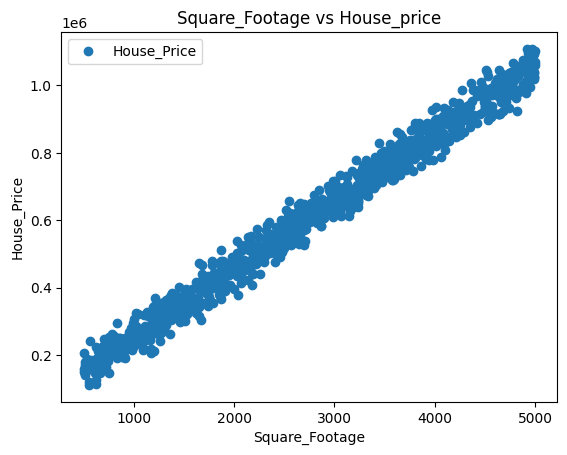

In [16]:
data.plot(x='Square_Footage', y='House_Price', style='o')
plt.title('Square_Footage vs House_price')
plt.xlabel('Square_Footage')
plt.ylabel('House_Price')
plt.show()

In [17]:
X = data.iloc[:, :-1]. values
y = data.iloc[:, -1]. values

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train , y_train)

LinearRegression()

In [20]:
print(regressor.intercept_)
print(regressor.coef_)

-2027795.4573683913
[  199.7890175  10062.46470151  7965.6434759   1002.26285849
 14966.64625596  4543.16872734   154.74291821]


In [21]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame ({'Actual': y_test , 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,786584.610239,784748.728461
1,792681.518420,797946.505587
2,895675.554821,917634.177179
3,239234.574322,238229.998351
4,510968.140654,503563.524764


In [22]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))

Mean Squared Error: 98600467.10699335
